In [1]:
import torch
from torch.nn import Module, Sigmoid, CrossEntropyLoss
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch import optim
from torch.autograd import Variable

import torchvision
from torchvision.datasets import MNIST

from torchvision import transforms


import matplotlib.pyplot as plt

from annpy.models.mlp import MLPClassifier
from torchtrainer import SupervisedTrainer
from torchtrainer.base import ValidationGranularity
from torchtrainer.meters import CategoricalAccuracy
from torchtrainer.callbacks import Logger

TRAIN = True
EPOCHS = 40
MODEL_PATH = 'models_saved'
USE_CUDA = True

In [2]:
data_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Lambda(lambda x: x.view(x.numel()))])
training_dataset = MNIST('data', train=True, transform=data_transform, download=True)
data_loader_training = DataLoader(training_dataset,
                          batch_size=2048,
                          shuffle=True,
                          num_workers=4,
                           )

In [3]:
testing_dataset = MNIST('data', train=False, transform=data_transform, download=True)
data_loader_testing = DataLoader(testing_dataset,
                          batch_size=2048,
                          shuffle=True,
                          num_workers=4,
                           )

In [4]:
network=MLPClassifier([28*28, 800, 100], classes=range(10))

In [5]:
trainer = SupervisedTrainer(model=network,
                            criterion=CrossEntropyLoss(),
                            optimizer=optim.SGD(network.parameters(), lr=0.5),
                            acc_meters={'acc': CategoricalAccuracy()},
                            callbacks=[Logger()],
                            logging_frecuency=10,
                            validation_granularity=ValidationGranularity.AT_LOG)

In [6]:
if USE_CUDA:
    trainer.cuda()

In [7]:
trainer.train(data_loader_training,
              valid_dataloader=data_loader_testing,
              epochs=20)

epoch: 0/20,	step: 9/30,	train_loss: 2.306,	train_acc: 0.108,	val_loss: 2.301,	val_acc: 0.114
epoch: 0/20,	step: 19/30,	train_loss: 2.302,	train_acc: 0.103,	val_loss: 2.293,	val_acc: 0.116
epoch: 0/20,	step: 29/30,	train_loss: 2.292,	train_acc: 0.167,	val_loss: 2.309,	val_acc: 0.114
epoch: 1/20,	step: 9/30,	train_loss: 2.289,	train_acc: 0.138,	val_loss: 2.286,	val_acc: 0.119
epoch: 1/20,	step: 19/30,	train_loss: 2.280,	train_acc: 0.135,	val_loss: 2.272,	val_acc: 0.121
epoch: 1/20,	step: 29/30,	train_loss: 2.268,	train_acc: 0.151,	val_loss: 2.268,	val_acc: 0.125
epoch: 2/20,	step: 9/30,	train_loss: 2.254,	train_acc: 0.249,	val_loss: 2.240,	val_acc: 0.387
epoch: 2/20,	step: 19/30,	train_loss: 2.230,	train_acc: 0.272,	val_loss: 2.213,	val_acc: 0.157
epoch: 2/20,	step: 29/30,	train_loss: 2.192,	train_acc: 0.260,	val_loss: 2.182,	val_acc: 0.207
epoch: 3/20,	step: 9/30,	train_loss: 2.182,	train_acc: 0.156,	val_loss: 2.166,	val_acc: 0.183
epoch: 3/20,	step: 19/30,	train_loss: 2.108,	train_acc

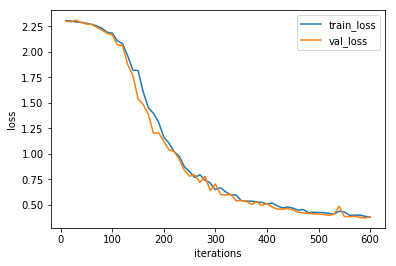

In [8]:
import matplotlib.pyplot as plt
trainer.history.step_plot('train_loss')
trainer.history.step_plot('val_loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.legend()
plt.show()

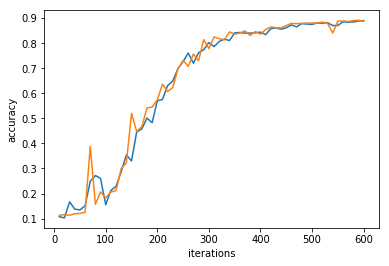

In [9]:
import matplotlib.pyplot as plt
trainer.history.step_plot('train_acc')
trainer.history.step_plot('val_acc')
plt.xlabel('iterations')
plt.ylabel('accuracy')
plt.show()